In [2]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # for building the model
from sklearn.metrics import classification_report, confusion_matrix # for evaluating the model
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning
from sklearn.metrics import roc_curve, auc # for ROC curve and AUC
from sklearn.preprocessing import LabelEncoder # for encoding categorical features

In [4]:
ticket_df = pd.read_csv('Support_tickets.csv')
ticket_df.head()
ticket_df.info()
ticket_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket_id               50000 non-null  int64  
 1   day_of_week             50000 non-null  object 
 2   day_of_week_num         50000 non-null  int64  
 3   company_id              50000 non-null  int64  
 4   company_size            50000 non-null  object 
 5   company_size_cat        50000 non-null  int64  
 6   industry                50000 non-null  object 
 7   industry_cat            50000 non-null  int64  
 8   customer_tier           50000 non-null  object 
 9   customer_tier_cat       50000 non-null  int64  
 10  org_users               50000 non-null  int64  
 11  region                  50000 non-null  object 
 12  region_cat              50000 non-null  int64  
 13  past_30d_tickets        50000 non-null  int64  
 14  past_90d_incidents      50000 non-null

(50000, 33)

In [5]:
ticket_df

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,...,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,1000000000,Wed,3,100015,Small,1,media,7,Basic,1,...,6,0,0,0,0,neutral,2,227,low,1
1,1000000001,Sat,6,100023,Small,1,healthcare,5,Basic,1,...,2,0,0,0,0,neutral,2,461,low,1
2,1000000002,Mon,1,100012,Small,1,gaming,4,Basic,1,...,0,0,0,0,1,positive,3,306,low,1
3,1000000003,Wed,3,100003,Small,1,media,7,Plus,2,...,16,0,0,0,1,neutral,2,363,medium,2
4,1000000004,Mon,1,100019,Small,1,ecommerce,2,Plus,2,...,6,0,0,0,0,neutral,2,442,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1000049995,Wed,3,100021,Medium,2,ecommerce,2,Plus,2,...,0,0,0,0,0,neutral,2,483,low,1
49996,1000049996,Fri,5,100010,Large,3,saas_b2b,3,Plus,2,...,0,0,0,0,1,neutral,2,319,low,1
49997,1000049997,Tue,2,100002,Large,3,fintech,1,Enterprise,3,...,0,0,0,0,1,neutral,2,616,high,3
49998,1000049998,Wed,3,100022,Medium,2,saas_b2b,3,Enterprise,3,...,0,0,0,0,1,neutral,2,526,medium,2


In [6]:
ticket_df.isnull().sum()

ticket_id                   0
day_of_week                 0
day_of_week_num             0
company_id                  0
company_size                0
company_size_cat            0
industry                    0
industry_cat                0
customer_tier               0
customer_tier_cat           0
org_users                   0
region                      0
region_cat                  0
past_30d_tickets            0
past_90d_incidents          0
product_area                0
product_area_cat            0
booking_channel             0
booking_channel_cat         0
reported_by_role            0
reported_by_role_cat        0
customers_affected          0
error_rate_pct              0
downtime_min                0
payment_impact_flag         0
security_incident_flag      0
data_loss_flag              0
has_runbook                 0
customer_sentiment        906
customer_sentiment_cat      0
description_length          0
priority                    0
priority_cat                0
dtype: int

In [ ]:
# 'priority' is the target column and all others are features
# Drop derived/category columns so the model does not use those features
X = ticket_df.drop(['priority', 'company_size_cat', 'industry_cat', 'customer_tier_cat', 'region_cat', 'product_area_cat', 'booking_channel_cat', 'reported_by_role_cat', 'customer_sentiment_cat', 'priority_cat'], axis=1)
y = ticket_df['priority']

# Since we have categorical columns, encode them first
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a Random Forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('\nTop 10 Feature Importances:')
print(importances.head(10))


Classification Report:
              precision    recall  f1-score   support

        high       0.94      0.85      0.89      1472
         low       0.95      0.97      0.96      5033
      medium       0.89      0.90      0.90      3495

    accuracy                           0.93     10000
   macro avg       0.93      0.91      0.92     10000
weighted avg       0.93      0.93      0.93     10000

Confusion Matrix:
[[1253    0  219]
 [   0 4859  174]
 [  76  257 3162]]

Top 10 Feature Importances:
customers_affected    0.236133
downtime_min          0.218648
error_rate_pct        0.104094
org_users             0.059213
description_length    0.058744
company_size          0.052570
product_area          0.041187
ticket_id             0.031111
past_30d_tickets      0.028274
customer_tier         0.026170
dtype: float64


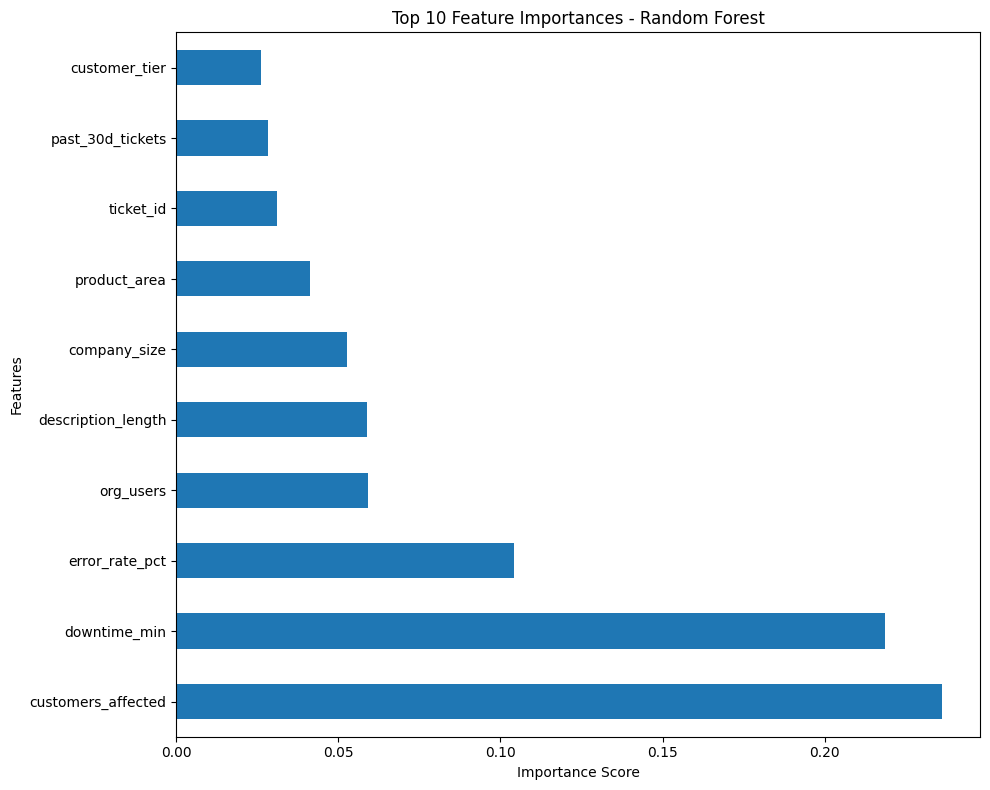

In [9]:
# Plot top feature importances
plt.figure(figsize=(10, 8))
importances.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


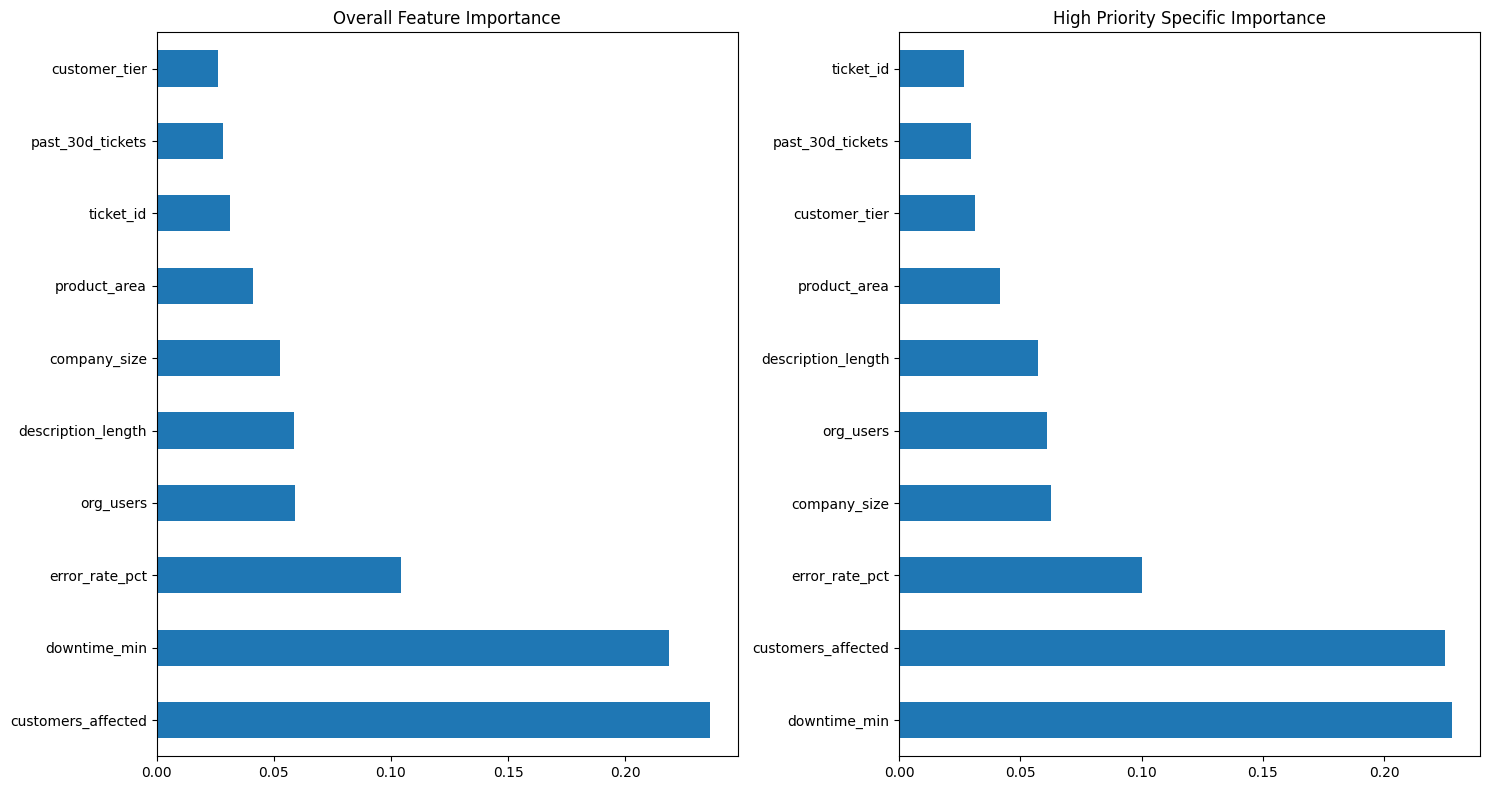

In [10]:
# 1. Feature Importance Comparison: High Priority vs Overall
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Overall feature importance
overall_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
overall_importance.head(10).plot(kind='barh', ax=ax1, title='Overall Feature Importance')

# High priority specific model
y_binary = (y_train == 'high').astype(int)
ranfor_high = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_high.fit(X_train, y_binary)
high_importance = pd.Series(ranfor_high.feature_importances_, index=X_train.columns).sort_values(ascending=False)
high_importance.head(10).plot(kind='barh', ax=ax2, title='High Priority Specific Importance')

plt.tight_layout()
plt.show()

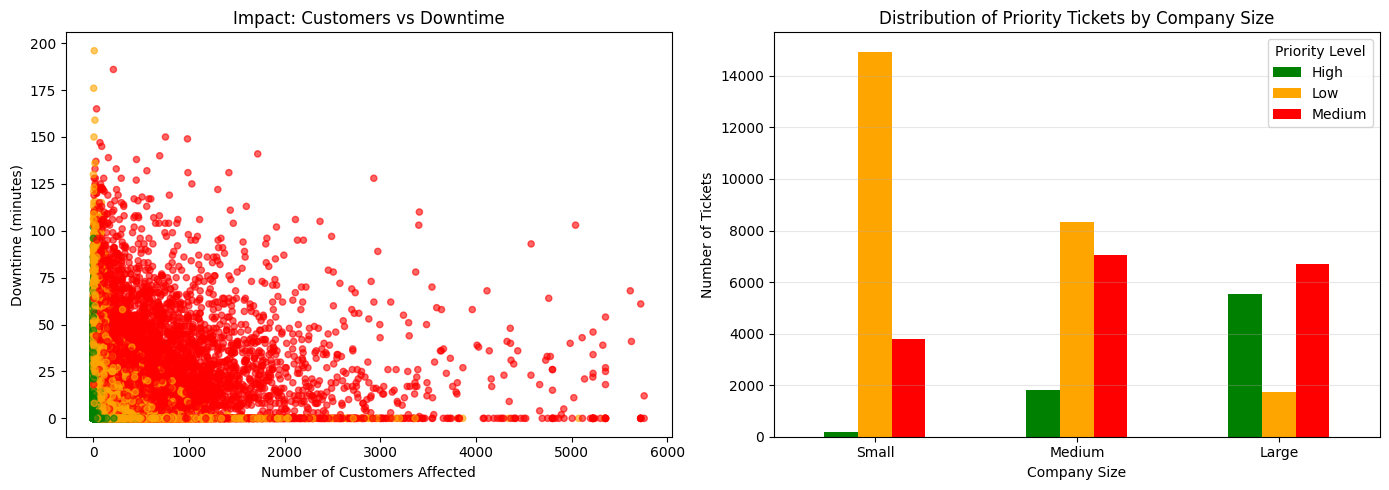

In [14]:
# Create a single row with two subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 5))

# Color code by priority
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
ticket_df['color'] = ticket_df['priority'].map(colors)

# Plot 1: Customers affected vs Downtime
ax1.scatter(ticket_df['customers_affected'], ticket_df['downtime_min'], 
           c=ticket_df['color'], alpha=0.6, s=20)
ax1.set_xlabel('Number of Customers Affected')
ax1.set_ylabel('Downtime (minutes)')
ax1.set_title('Impact: Customers vs Downtime')

# Count how many tickets of each priority level exist for each company size
size_priority_counts = ticket_df.groupby(['company_size', 'priority']).size().unstack(fill_value=0)
size_priority_counts = size_priority_counts.reindex(['Small', 'Medium', 'Large'])  # Order by size

# Create a grouped bar chart
size_priority_counts.plot(kind='bar', ax=ax3, color=['green', 'orange', 'red'])
ax3.set_title('Distribution of Priority Tickets by Company Size')
ax3.set_xlabel('Company Size')
ax3.set_ylabel('Number of Tickets')
ax3.legend(title='Priority Level', labels=['High', 'Low', 'Medium'])
ax3.tick_params(axis='x', rotation=0)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
